In [1]:
# Parametros Iniciales
weeks = 100 # Cantidad de semanas que hara la simulacion.
time_interval = 1 # Incremento de tiempo en semanas.
terrain_capacity = 1000 # Capacidad del terreno de alimentar liebres.
rabbits_population = 500 # Cantidad inicial de liebres.
foxes_population = 10 # Cantidad inicial de zorros.
rabbits_growth_rate = 0.08 # Tasa de crecimiento de liebres. (% por semana)
foxes_survival_rate = 0.2 # Tasa de supervivencia de zorros. (% por semana)
hunting_encounters = foxes_population * rabbits_population # Cantidad inicial de encuentros de caza
hunting_encounters_rate = foxes_population / hunting_encounters # Tasa de mortalidad de los liebres por cada caza.
foxes_population_increase = foxes_survival_rate * foxes_population / hunting_encounters   # Tasa de crecimiento de la poblacion de zorros por cada caza.

In [2]:
# Creación de listas para almacenar los resultados de la simulación
rabbits_population_list = [rabbits_population]
foxes_population_list = [foxes_population]

In [3]:
# Bucle para iterar sobre el modelo
for week in range(weeks):
    # Capacidad actual del terreno para sostener a las liebres
    current_terrain_capacity = terrain_capacity - rabbits_population
    
    # Aumento de la población de liebres en función de la capacidad del terreno
    rabbit_population_increase = (1 / terrain_capacity) * current_terrain_capacity * rabbits_growth_rate * rabbits_population
    
    # Cantidad de zorros que sobreviven cada semana sin comer
    foxes_surviving_population = foxes_survival_rate * foxes_population
    
    # Cantidad de encuentros de caza que se producen en la semana
    hunting_encounters = foxes_population * rabbits_population
    
    # Actualización de la población de liebres
    rabbits_population = max(rabbits_population + time_interval * (rabbit_population_increase - hunting_encounters_rate * hunting_encounters), 0) # Evita que la población de liebres sea negativa.
    
    # Actualización de la población de zorros
    foxes_population = max(foxes_population + time_interval * (foxes_population_increase * hunting_encounters - foxes_surviving_population), 0) # Evita que la población de zorros sea negativa.
    
    rabbits_population_list.append(rabbits_population)
    foxes_population_list.append(foxes_population)
    
    # Imprime las poblaciones de liebres y zorros para cada semana
    print(f"Semana {week+1} | Liebres: {int(rabbits_population)} | Zorros: {int(foxes_population)}")

Semana 1 | Liebres: 510 | Zorros: 10
Semana 2 | Liebres: 519 | Zorros: 10
Semana 3 | Liebres: 529 | Zorros: 10
Semana 4 | Liebres: 538 | Zorros: 10
Semana 5 | Liebres: 547 | Zorros: 10
Semana 6 | Liebres: 555 | Zorros: 10
Semana 7 | Liebres: 563 | Zorros: 10
Semana 8 | Liebres: 571 | Zorros: 11
Semana 9 | Liebres: 578 | Zorros: 11
Semana 10 | Liebres: 584 | Zorros: 11
Semana 11 | Liebres: 590 | Zorros: 12
Semana 12 | Liebres: 595 | Zorros: 12
Semana 13 | Liebres: 599 | Zorros: 13
Semana 14 | Liebres: 602 | Zorros: 13
Semana 15 | Liebres: 605 | Zorros: 14
Semana 16 | Liebres: 607 | Zorros: 14
Semana 17 | Liebres: 608 | Zorros: 15
Semana 18 | Liebres: 608 | Zorros: 16
Semana 19 | Liebres: 608 | Zorros: 16
Semana 20 | Liebres: 607 | Zorros: 17
Semana 21 | Liebres: 604 | Zorros: 18
Semana 22 | Liebres: 601 | Zorros: 19
Semana 23 | Liebres: 598 | Zorros: 19
Semana 24 | Liebres: 593 | Zorros: 20
Semana 25 | Liebres: 588 | Zorros: 21
Semana 26 | Liebres: 582 | Zorros: 22
Semana 27 | Liebres: 

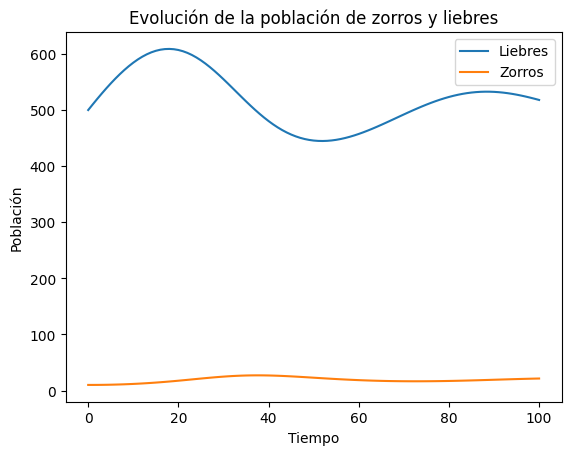

In [4]:
import matplotlib.pyplot as plt

# Creación de la gráfica
plt.plot(rabbits_population_list, label="Liebres")
plt.plot(foxes_population_list, label="Zorros")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.title("Evolución de la población de zorros y liebres")
plt.legend()
plt.show()